In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [3]:
netflix_df = pd.read_csv("../Netflix_dataset/titles.csv")
netflix_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,MOVIE,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",['KW'],NaN,NaN,NaN,NaN,3.351,2.000
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],['TR'],NaN,tt26349328,7.9,209.0,2.450,7.200
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],['US'],NaN,tt21033382,6.1,91.0,1.960,NaN
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],['NG'],NaN,tt14922926,5.2,18.0,1.357,4.000


### Description이 없는 행 제거

In [4]:
# 디스크립션이 없는 행 제거
netflix_df = netflix_df.dropna(subset=['description'])

In [5]:
# 디스크립션 리스트 생성
corpus = netflix_df['description'].tolist()
corpus

['This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries "Five Came Back."',
 'When world heavyweight boxing champion, Apollo Creed wants to give an unknown fighter a shot at the title as a publicity stunt, his handlers choose palooka Rocky Balboa, an uneducated collector for a Philadelphia loan shark. Rocky teams up with trainer  Mickey Goldmill to make the most of this once in a lifetime break.',
 "Australian good girl Sandy and greaser Danny fell in love over the summer. But when they unexpectedly discover they're now in the same high school, will they be able to rekindle their romance despite their eccentric friends?",
 'A novice con man teams up with an acknowledged master to avenge the murder of a mutual friend by pulling off the ultimate big con and swindling a fortune from a big-time mobster.',
 'After Rocky goes the distance with champ Apollo Creed, both try to put the fight behind them and move on.

In [6]:
# CountVectorizer 인스턴스 생성
vector = CountVectorizer(stop_words="english")
vector

CountVectorizer(stop_words='english')

In [7]:
# Bag of Words 벡터화
print(vector.fit_transform(corpus).toarray())
print("총 영상 개수: ", len(vector.fit_transform(corpus).toarray()))
print("총 등장 단어 개수", len(vector.fit_transform(corpus).toarray()[0]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
총 영상 개수:  6114
총 등장 단어 개수 21089


In [8]:
# 단어 딕셔너리
print("vocabulary: ", vector.vocabulary_)

vocabulary:  {'collection': 3804, 'includes': 9241, '12': 14, 'world': 20626, 'war': 20218, 'ii': 9074, 'era': 6287, 'propaganda': 14664, 'films': 6989, 'graphic': 7959, 'offensive': 13142, 'discussed': 5348, 'docuseries': 5499, 'came': 2952, 'heavyweight': 8511, 'boxing': 2554, 'champion': 3290, 'apollo': 1170, 'creed': 4409, 'wants': 20216, 'unknown': 19636, 'fighter': 6962, 'shot': 17006, 'title': 18935, 'publicity': 14772, 'stunt': 18062, 'handlers': 8297, 'choose': 3505, 'palooka': 13567, 'rocky': 15972, 'balboa': 1783, 'uneducated': 19560, 'collector': 3807, 'philadelphia': 13973, 'loan': 11002, 'shark': 16872, 'teams': 18604, 'trainer': 19120, 'mickey': 11974, 'goldmill': 7852, 'make': 11365, 'lifetime': 10888, 'break': 2610, 'australian': 1594, 'good': 7866, 'girl': 7764, 'sandy': 16319, 'greaser': 7981, 'danny': 4685, 'fell': 6871, 'love': 11127, 'summer': 18175, 'unexpectedly': 19570, 'discover': 5337, 'high': 8624, 'school': 16475, 'able': 340, 'rekindle': 15451, 'romance': 

In [9]:
len(vector.vocabulary_)

21089

In [10]:
# 딕셔너리 value를 기준으로 정렬 (인덱스를 기준으로)
sorted_dict = dict(sorted(vector.vocabulary_.items(), key=lambda x: x[1]))
sorted_dict

{'00': 0,
 '000': 1,
 '0093': 2,
 '05': 3,
 '10': 4,
 '100': 5,
 '1001': 6,
 '100th': 7,
 '101': 8,
 '102': 9,
 '10th': 10,
 '10x': 11,
 '11': 12,
 '11th': 13,
 '12': 14,
 '120': 15,
 '125': 16,
 '12th': 17,
 '13': 18,
 '13th': 19,
 '14': 20,
 '14th': 21,
 '15': 22,
 '150': 23,
 '15th': 24,
 '16': 25,
 '160': 26,
 '1609': 27,
 '1623': 28,
 '1636': 29,
 '1666': 30,
 '16mm': 31,
 '16th': 32,
 '17': 33,
 '1743': 34,
 '1787': 35,
 '17th': 36,
 '18': 37,
 '1800s': 38,
 '180km': 39,
 '183': 40,
 '1835': 41,
 '1843': 42,
 '1854': 43,
 '1860': 44,
 '1862': 45,
 '1867': 46,
 '1868': 47,
 '1879': 48,
 '1889': 49,
 '1890': 50,
 '1890s': 51,
 '1897': 52,
 '1898': 53,
 '1899': 54,
 '18th': 55,
 '19': 56,
 '1900': 57,
 '1900s': 58,
 '1901': 59,
 '1905': 60,
 '1908': 61,
 '1909': 62,
 '1914': 63,
 '1916': 64,
 '1917': 65,
 '1918': 66,
 '1919': 67,
 '1920s': 68,
 '1921': 69,
 '1926': 70,
 '1927': 71,
 '1928': 72,
 '1929': 73,
 '1930': 74,
 '1930s': 75,
 '1933': 76,
 '1934': 77,
 '1936': 78,
 '1937': 7

In [13]:
# 군집화를 위해 행렬 생성

labels = netflix_df['id'].tolist()
print("총 영상 개수", len(col))

col = sorted_dict.keys()
#labels


총 영상 개수 6114


In [14]:
# 거리 행렬 생성

dist_df = pd.DataFrame(vector.fit_transform(corpus).toarray(), columns=col, index=labels)
dist_df

,00,000,0093,05,10,100,1001,100th,101,102,...,يحاولن,يرفض,يرفضن,يقيمن,आव,गल,ガチ,ベイブレードバーストgt,非天夜翔,麻婆斗妇
ts300399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm82169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm17823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm191099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm69975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tm1303784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm1260999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm1310286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tm1072700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 거리 행렬 생성 (좀 오래 걸림..)

from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(dist_df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

In [18]:

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(dist_df, metric='euclidean'), method='complete')

pd.DataFrame(row_clusters,
             columns=['row label 1', 
                      'row label 2',
                      'distance', 
                      'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,5546.0,5787.0,0.000000,2.0
cluster 2,3493.0,5792.0,0.000000,2.0
cluster 3,5471.0,6114.0,1.000000,3.0
cluster 4,1123.0,1193.0,1.414214,2.0
cluster 5,1396.0,3503.0,1.732051,2.0
...,...,...,...,...
cluster 6109,453.0,526.0,20.542639,2.0
cluster 6110,12221.0,12222.0,20.591260,6108.0
cluster 6111,12215.0,12223.0,21.563859,6112.0
cluster 6112,3413.0,12224.0,22.271057,6113.0


In [19]:
row_clusters

array([[5.54600000e+03, 5.78700000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.49300000e+03, 5.79200000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.47100000e+03, 6.11400000e+03, 1.00000000e+00, 3.00000000e+00],
       ...,
       [1.22150000e+04, 1.22230000e+04, 2.15638587e+01, 6.11200000e+03],
       [3.41300000e+03, 1.22240000e+04, 2.22710575e+01, 6.11300000e+03],
       [3.43000000e+02, 1.22250000e+04, 2.63438797e+01, 6.11400000e+03]])

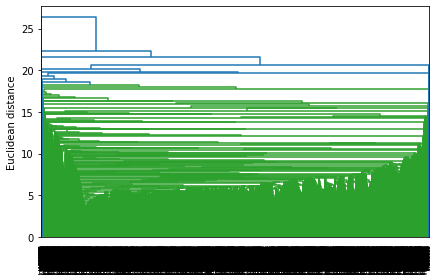

In [20]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# 검은색 덴드로그램 만들기 (1/2 부분만)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()